# Data Visualization

Most of the time, the data we have looks like the one below. It's tabular representation is suitable for a statistical framework but severly disadvantaged in terms expressing the dynamics of the data.

![](http://quantminer.github.io/QuantMiner/HELP/base_example.jpg)

Visualization helps us understand the data by creating visual encodings with different elements such as color, shape and lenght.

![](https://imdevsoftware.files.wordpress.com/2012/08/clipboard04.jpg)

In this notebook, we'll go through some of the visualization techniques with maplotlib and seaborn libraries and then finish with some examples on interactive visualization with altair.

## Matplotlib

Matplotlib is a Python plotting library in which you can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code.

![](https://matplotlib.org/_images/anatomy.png)

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

%matplotlib inline



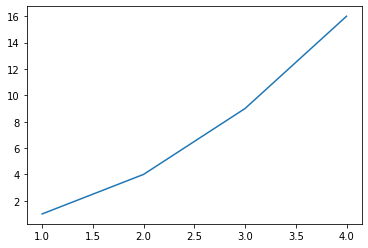

In [0]:
# let's start with the basics
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

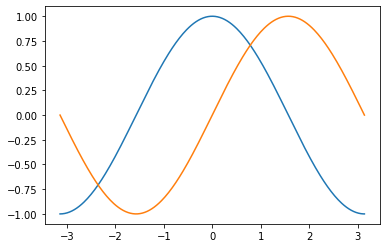

In [0]:
# let's plot cosine and sine functions
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c = np.cos(x)
s = np.sin(x)

plt.plot(x, c)  # first parameter x-axis, second one y-axis
plt.plot(x, s)
plt.show()

### A smal exercise

Plot the following function on the range [0, 10].

$f(x) \, = \, e^{-x/10}*sin(\pi x)$

In [0]:
# your code

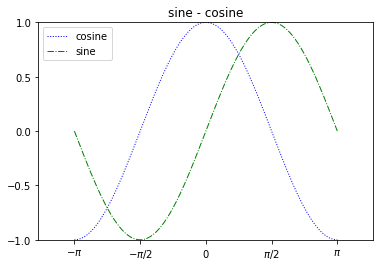

In [0]:
# playing with the defaults
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c = np.cos(x)
s = np.sin(x)

# blue color with a continuous line of width 1 (pixels)
plt.plot(x, c, color="blue", linewidth=1.0, linestyle=":", label="cosine")

# green color with a continuous line of width 1 (pixels)
plt.plot(x, s, color="green", linewidth=1.0, linestyle="-.", label="sine")

# set x limits
plt.xlim(-4.0,4.0)
# set y limits
plt.ylim(-1.0,1.0)

# set x ticks
#plt.xticks(np.linspace(-4,4,5,endpoint=True))
#plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

# set y ticks
plt.yticks(np.linspace(-1,1,5,endpoint=True))

# enable the legend
plt.legend()

# add title
plt.title("sine - cosine")

plt.show()

### Viusal Encoding

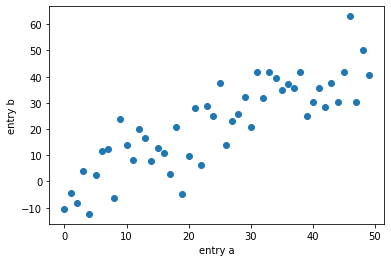

In [0]:
data = {
        'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)
       }

data['b'] = data['a'] + 10 * np.random.randn(50)  # adding a new key
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', data=data)  # a -> x-axis, b-> y-axis

plt.xlabel('entry a')
plt.ylabel('entry b')

plt.show()

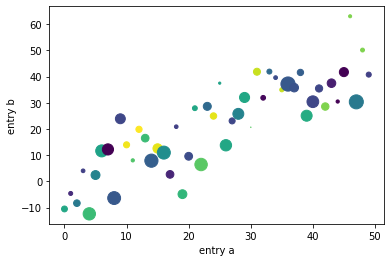

In [0]:
plt.scatter('a', 'b', c='c', s='d', data=data)  # setting x and y axes from the data
                                                # c = color coding, s = size of each dot

plt.xlabel('entry a')
plt.ylabel('entry b')

plt.show()

### Visual Encoding Exercise

In this exercise, we'll utilize the same dataset and plot the exact same scatter plot with the same color scheme. However, in this exercise, we are going to leverage the shape encoding to distinguish the data instances that are greater than the mean value of column d.

In [0]:
# your code

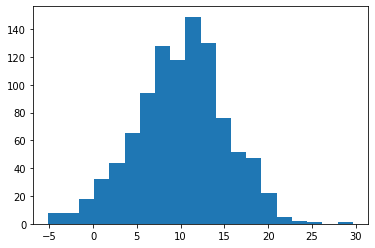

In [0]:
x = np.random.normal(10, 5, 1000)  # normal dist. with mean set to 10 and variance to 5

plt.hist(x, bins=20)
plt.show()

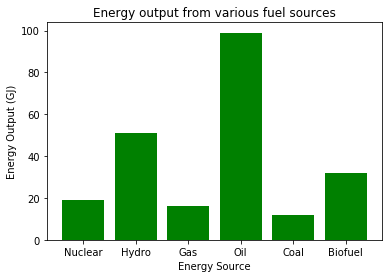

In [0]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = np.random.randint(10, 100, len(x))

x_pos = [i for i, _ in enumerate(x)]  # equivalent of np.arange(len(x))

plt.bar(x_pos, energy, color='green')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

plt.show()

### Playing with the layout

![](https://matplotlib.org/1.5.1/_images/fig_map.png)

Text(0.5, 0.98, 'Categorical Plotting')

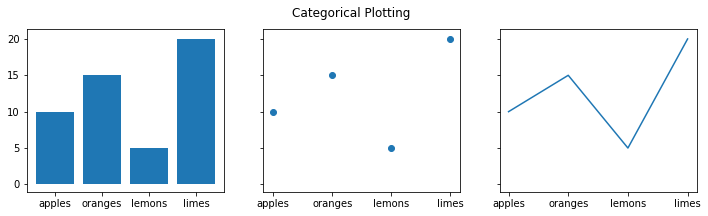

In [0]:
data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True) # 1 row with 3 columns
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')  # figure title

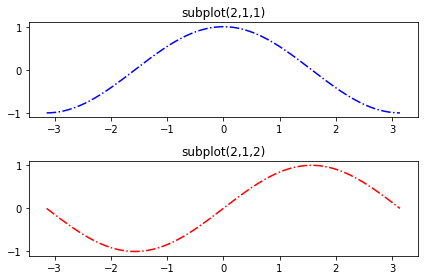

In [0]:
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c = np.cos(x)
s = np.sin(x)
 
plt.subplot(2,1,1)  # row, column, column position (first)
#plt.subplot(211)  # another format to represent the position
plt.title('subplot(2,1,1)')
plt.plot(x,c, 'b-.')
 
plt.subplot(2,1,2)
plt.title('subplot(2,1,2)')
plt.plot(x,s,'r-.')
 
plt.tight_layout()  # adjusting subplot positions
plt.show()

## Visualization with Pandas

Pandas has a visualization module based on matplotlib. It provides a much neater interface.

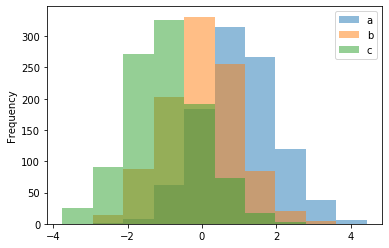

In [0]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df.plot.hist(alpha=0.5)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


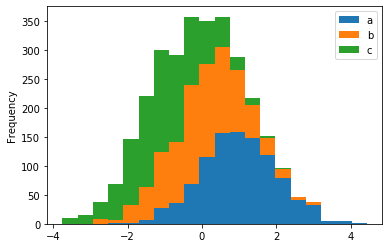

In [0]:
val = df.plot.hist(stacked=True, bins=20)  # accepts matplotlib arguments

print(type(val))  # returns an axes object

plt.show()

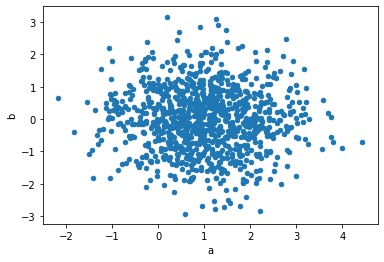

In [0]:
df.plot.scatter(x="a", y="b")

plt.show()

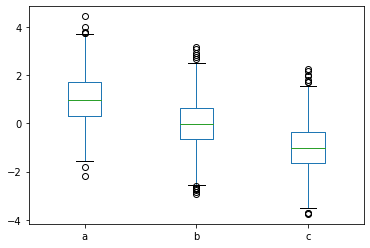

In [0]:
df.plot(kind="box")

plt.show()

### Titanic Passengers

- Read `titanic.tsv` into a dataframe.
- Show age distributions for survived and deceased passengers on a 2x1 figure.

In [0]:
# your code

## Seaborn 

Seaborn is a visualization library based on matplotlib. It provides a high-level interface.

In [0]:
import seaborn as sns
from os.path import join

sns.set_style("darkgrid")

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
path_prefix = "/content/gdrive/My Drive/"
data_path = "DataVis/data"
fname = "nba_players_modified.csv"

df = pd.read_csv(join(path_prefix, data_path, fname))

In [0]:
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980-01-01,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.000,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,1980-01-01,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,0.003,0.258,5.4,12.0,8.6,9.3,1.4,0.6,9.9,13.3,1.2,0.8,2.0,0.080,-1.5,-0.1,-1.6,0.1,153.0,318.0,0.481,0.0,1.0,0.000,153.0,317.0,0.483,0.481,56.0,82.0,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,1980-01-01,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,0.002,0.270,8.2,22.4,15.4,21.6,2.3,1.4,18.2,21.9,3.1,3.9,7.0,0.155,1.6,2.8,4.4,3.5,465.0,875.0,0.531,0.0,2.0,0.000,465.0,873.0,0.533,0.531,188.0,236.0,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,1980-01-01,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,0.023,0.548,2.3,5.3,3.8,30.2,1.7,0.2,19.7,17.0,5.9,2.9,8.9,0.148,1.1,-1.1,0.0,1.5,383.0,794.0,0.482,4.0,18.0,0.222,379.0,776.0,0.488,0.485,361.0,435.0,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,1980-01-01,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,0.000,0.833,6.0,16.9,11.5,9.0,1.0,1.5,24.8,7.9,0.1,0.5,0.6,0.053,-2.9,1.5,-1.4,0.1,27.0,60.0,0.450,0.0,0.0,0.000,27.0,60.0,0.450,0.450,32.0,50.0,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


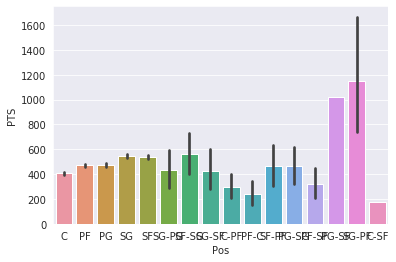

In [0]:
sns.barplot(x="Pos", y="PTS", data=df)

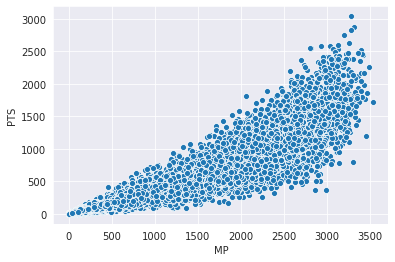

In [0]:
sns.scatterplot(x="MP", y="PTS", data=df)

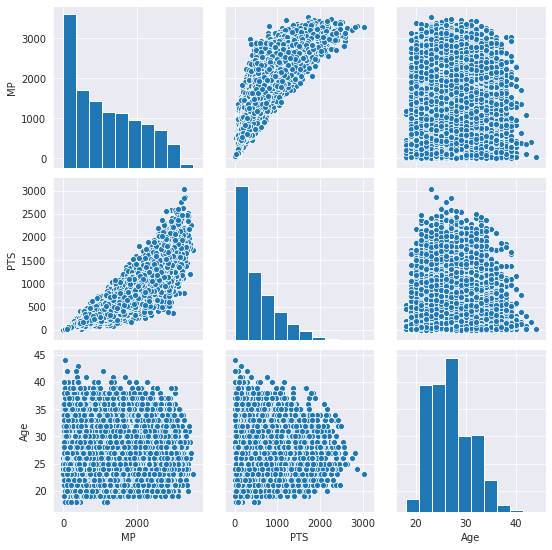

In [0]:
sns.pairplot(df[['MP', 'PTS', 'Age']])

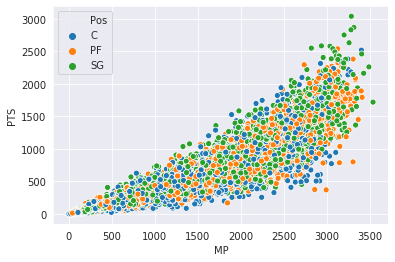

In [0]:
positions = ["C", "PF", "SG"]
df_pos = df[df["Pos"].isin(positions)]  # filter the original df

sns.scatterplot(x="MP", y="PTS", data=df_pos, hue="Pos")  # grouping variable with hue

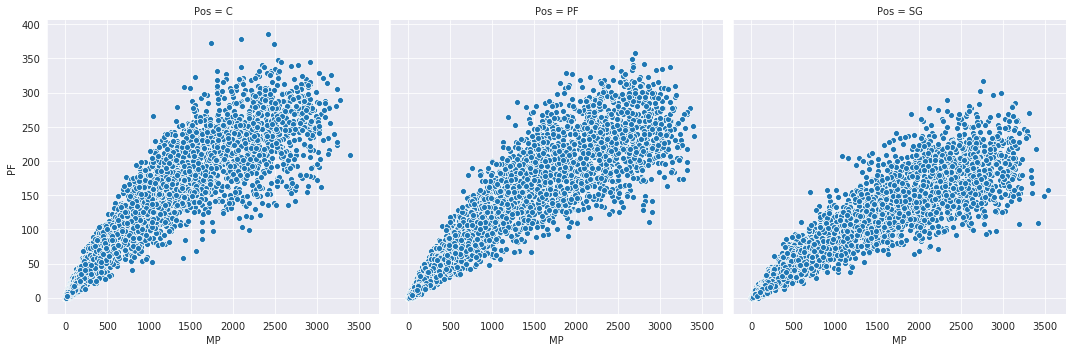

In [0]:
sns.relplot(x="MP", y="PF", col="Pos", data=df_pos)

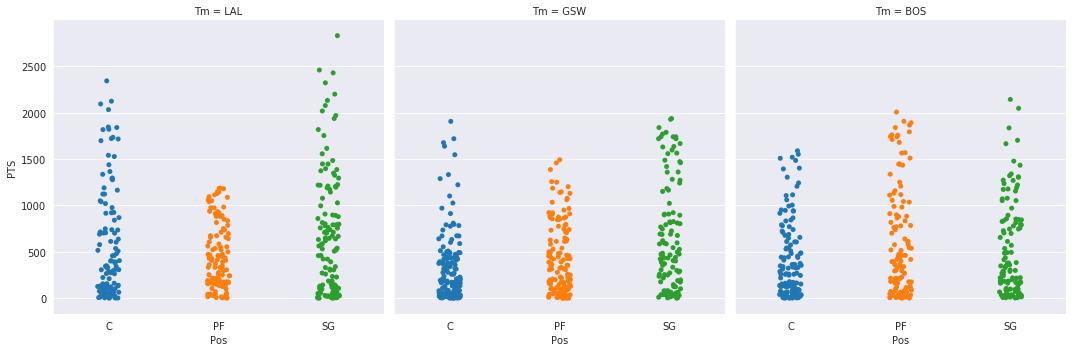

In [0]:
teams = ["LAL", "GSW", "BOS"]
df_pos = df_pos[df_pos["Tm"].isin(teams)]

sns.catplot(x="Pos", y="PTS", col="Tm", data=df_pos)

The core seaborn utility for faceting is the FacetGrid. A FacetGrid is an object which stores some information on how you want to break up your data visualization.

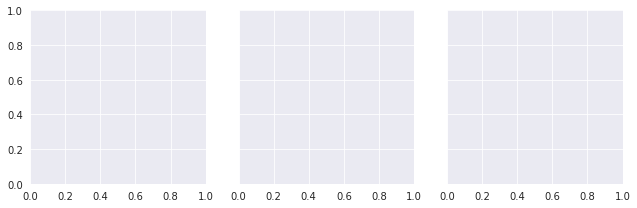

In [0]:
g = sns.FacetGrid(df_pos, col="Pos")

In [0]:
type(g)

seaborn.axisgrid.FacetGrid

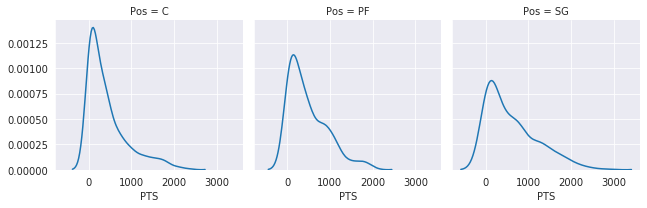

In [0]:
g = sns.FacetGrid(df_pos, col="Pos")
g.map(sns.kdeplot, "PTS")

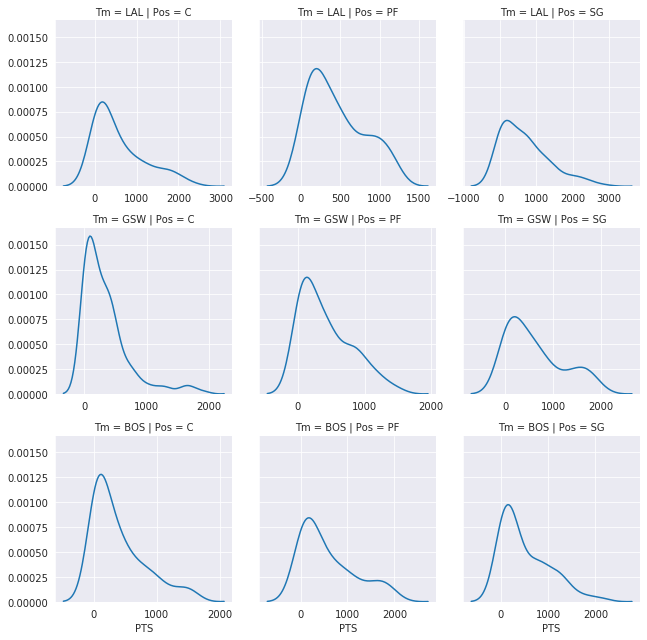

In [0]:
g = sns.FacetGrid(df_pos, row="Tm", col="Pos", sharex=False)
g.map(sns.kdeplot, "PTS")

## Spatial Data Visualization with `Folium`

[Folium](https://python-visualization.github.io/folium/) helps us build web-friendly interactive maps on a notebook environment. The library has built-in supports various data sources, such as GeoJSON, TopoJSON and regular tilesets.

In [0]:
import folium

Creating a map is very easy. All we have to do is to create a map instance.

In [0]:
m = folium.Map(location=[41.0082, 28.9784])
m

And whenever you are done with the implementation, you can save your final plot as a regular html file.

In [0]:
fname = "ist_map.png"
m.save(fname)

In [0]:
folium.Map(
    location=[41.0082, 28.9784],
    tiles='Stamen Toner',
    zoom_start=13
)

### Markers

In [0]:
m = folium.Map(location=[41.0082, 28.9784])

# marker definition
folium.Marker([41.0082, 28.9784]).add_to(m)
m

In [0]:
m = folium.Map(location=[41.0082, 28.9784])

# marker definition with additional attributes
tooltip = "Here!"
folium.Marker([41.0082, 28.9784], popup='<i>some content</i>', tooltip=tooltip).add_to(m)
m

### Shaped Markers

In [0]:
m = folium.Map(location=[41.0082, 28.9784])

folium.Circle(
    radius=800,  # in meters
    location=[41.0100, 28.9784],
    popup='content',
    color='crimson',
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[41.0062, 29.0910],
    radius=50, # pixels
    popup='content',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(m)

m

### GeoJSON

> standard format designed for representing simple geographical features, along with their non-spatial attributes

![](https://www.researchgate.net/profile/Hyung_Gyu_Ryoo/publication/323078852/figure/fig4/AS:592402637144064@1518251203779/Example-of-Solid-in-the-extended-GeoJSON.png)



In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [0]:
# GeoJSON URL
state_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

In [0]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    # the GeoJSON file that defines the state borders
    geo_data=state_geo,
    # the data to associate with the GeoJSON
    data=state_data,
    # the columns to be used from the dataframe
    # the value in the first index -> key
    # the second one -> actual value to be encoded
    columns=['State', 'Unemployment'],
    # the variable name in the GeoJSON
    # to be binding, it must start with 'feature' prefix
    key_on='feature.id',
    # styling
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    # legend name
    legend_name='Unemployment Rate (%)'
).add_to(m)

m

In [0]:
m = folium.Map(location=[48, -102], zoom_start=3)

cupcakes_url = "https://raw.githubusercontent.com/lyzidiamond/learn-geojson/master/geojson/cupcakes.geojson"
folium.GeoJson(cupcakes_url,
               tooltip=folium.features.GeoJsonTooltip(fields=['name', 'gluten free', 'open1'], localize=True)).add_to(m)
m

### Plug-ins

In [0]:
from folium.plugins import HeatMap

m = folium.Map(location=[41.0082, 28.9784], zoom_start=3, width=1000, height=500, tiles = "Stamen Terrain")

df = pd.read_csv("https://raw.githubusercontent.com/chrismeller/StarbucksLocations/master/stores.csv")

# extract coordinates
df = pd.read_csv("https://raw.githubusercontent.com/chrismeller/StarbucksLocations/master/stores.csv")
locs = df[["Latitude", "Longitude"]].dropna(how="any").values
# feed it to heatmap function
HeatMap(locs).add_to(m)

m